### Module 5: Introduction to Decision Tree Regression

Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity. They are classified as a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

- Decision tree algorithm falls under the category of ***supervised learning***. They can be used to solve both regression and classification problems.
- Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.
- We will control the depth of the tree using the max_depth hyperparameter.

<img src="images/dt.jpg" alt="Decision Tree" style="width: 400px;"/>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree  # The decision tree alorithm lives here
from sklearn.metrics import r2_score,mean_squared_error  # Let's add a new metric
import pandas as pd
import numpy as np
#from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

In [2]:
# Load the Boston housing dataset.
#     https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
data = datasets.load_boston() # loads Boston dataset from datasets library 
# Load all the possible features
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [3]:
# Investigate the data with a few useful functions from pandas
#
# Let's discuss the relevence of each of these
#
print('Data Types:\n',df.dtypes) # data types of columns
print('\nDescriptive Stats:\n',df.describe()) # stats
print('\nNumber of missing values in the data:',df.isnull().sum().sum())

Data Types:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

Descriptive Stats:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    

### Isolate the target variable

In [4]:
# The Target will be the median value "MEDV" in thousands of dollars
y = pd.DataFrame(data.target, columns=["MEDV"])
y.head(3)

,MEDV
0,24.0
1,21.6
2,34.7


### Isolate the features matrix

In [5]:
# Decide which features to include
print('Possible Features:\n',list(df.columns))
# Lets drop 'B'
X = df.drop(['B'], axis = 1)
X.head(2)

Possible Features:
 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14


### Split the data into training and test sets

In [6]:
# Split into train/test
# Reserver 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Verify the sizes of the split datasets
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (404, 12)
y_train: (404, 1)
X_test: (102, 12)
y_test: (102, 1)


### Create the model and train it

In [7]:
# Create the regressor object
# This algorithm is from the sklearn.tree module
regressor = tree.DecisionTreeRegressor(max_depth = 2) # Discuss hyperparameter max_depth
#
# Train the model using the training data
fit_tree = regressor.fit(X_train, y_train)
# Read about the hyperparameters here:
#    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
fit_tree # Show hyperparameters

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [8]:
# Predict new MEDV values using the X_test data
y_pred = regressor.predict(X_test)

### How to evaluate performance of a decision tree?
In addition to R^2, let's add a couple more statistics:
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)

https://statisticsbyjim.com/regression/mean-squared-error-mse/


In [9]:
# Calculate the metrics
r2 = round(r2_score(y_test, y_pred),2)
mse = round(mean_squared_error(y_test, y_pred),2)
#
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print("MSE: ", mse)
print("RMSE: ", round(mse**(1/2.0),3)) # Root Mean Squared Error

Coefficient of determination: 0.60
MSE:  33.97
RMSE:  5.828


#### Visualize the tree
A nice benefit for decision trees is the ability to visualize the tree. This helps when explaining how model evaluates features to make decisions. 
<P>
This is useful for trees that are not too "deep"    

In [10]:
# Use a textual representation
text_representation = tree.export_text(regressor,feature_names = list(X.columns))
print(text_representation)

|--- RM <= 6.83
|   |--- LSTAT <= 14.40
|   |   |--- value: [23.07]
|   |--- LSTAT >  14.40
|   |   |--- value: [14.93]
|--- RM >  6.83
|   |--- RM <= 7.44
|   |   |--- value: [31.32]
|   |--- RM >  7.44
|   |   |--- value: [45.92]



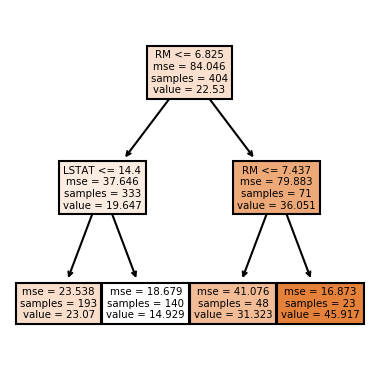

In [11]:
# Visualize the tree using a function from the sklearn.tree module
plt.figure(figsize=(3,3), dpi=150)
tree.plot_tree(regressor, feature_names=X.columns,filled=True)
plt.show()

Explation of this structure can be found here:<P>
https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py